# Predicting Students Dropout Risk Based on Academic, Familial and Socio-Economic Factors

<strong>Importng libraries and reading the data.</strong>
Dataset contains both Categorical and Numerical data.


In [163]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
as_dataframe = pd.read_csv("/Users/candacef/Documents/Capstone/academic-success-dataset.csv")

as_dataframe.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [165]:
as_dataframe['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

I will first determine the univeristy's drop out rate. To do that I need to know the total number of students and then divide it by the number of total students.

The presentation will be given to an audience in the United States, so I will adjust the spelling of Nacionality to Nationality.

In [166]:
as_dataframe.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

as_dataframe

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


I will now review the data types of each column. 

In [167]:
as_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

After observing the data types, the Target Column is an object. 

Below, a new column has been created named "Target Numeric' with cooresponding values for "Dropouts", "Enrolled" and "Graduates". Because our focus is dropouts, we will use (1) for "Dropouts" and (0) for "Graduate"

For this project we will slice out "Enrolled" students and then assess the data for "Dropouts" where "Dropouts" are 1 and "Graduates" are 0. The goal of the initial analysis is to indentify which factors contrubute the most to a student dropping out.

We will then create a model, run it on "Dropouts" to assess historical students and then run the model on currently "Enrolled" students to view which ones are the most a risk of dropping out. 

In [168]:
filtered_as_dataframe = as_dataframe[as_dataframe['Target'] != 'Enrolled'].copy()

filtered_as_dataframe['Target Numeric'] = filtered_as_dataframe['Target'].map({'Dropout': 1, 'Graduate': 0})

filtered_as_dataframe.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target Numeric
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


In [169]:
filtered_as_dataframe['Target Numeric'].mean()

0.39146005509641874

The dropout rate is 39.14% which is very high. We will now identify which factors have the highest correlations.

In [170]:
# Correlations

numeric_cols = filtered_as_dataframe.select_dtypes(include=[np.number])
correlations = numeric_cols.corr()['Target Numeric']
print(correlations)


Marital status                                    0.100479
Application mode                                  0.233888
Application order                                -0.094355
Course                                           -0.006814
Daytime/evening attendance                       -0.084496
Previous qualification                            0.102795
Nationality                                       0.003823
Mother's qualification                            0.048459
Father's qualification                            0.003850
Mother's occupation                              -0.064195
Father's occupation                              -0.073238
Displaced                                        -0.126113
Educational special needs                         0.007254
Debtor                                            0.267207
Tuition fees up to date                          -0.442138
Gender                                            0.251955
Scholarship holder                               -0.3130

Based on the correlations the following factors have the most impact on dropout rates. These are listed in descending order.


- Curricular Units 2nd Sem (Approved): -.654 
- Curricular units 2nd sem (grade): - 0.605
- Curricular units 1st sem (approved): - 0.555
- Curricular units 1st sem (grade): - 0.520
- Tuition Fees up to date: - .442
- Scholarship Holder: -.313
- Age at enrollment: .267
- Debtor: .267
- Gender: .252
- Application Mode: .234

Note:
Curricular Units (Approved) are the number of curricular units worth of courses the student completed.
Application Mode is the method of application used by the student.

We will take a look at these Top 10 factors as well as a few notable mentions.

# Analysis of Dropouts and Graduates
    
  Now that the "filtered_as_dataframe" has been created, we will take a look at the distribution of Dropouts and Graduates from a few different perspectives such as age at enrollment, curricular units, whether they are debtors and other factors included in the dataset.
    
We will then create a predictive model that utilizes information about Dropouts and Graduates.
    
# 3 Factor Categories have been created.

## Academic Factors
 Top 10
 - Age
 - Applications Mode
 - Curricular Units
 - Schoarlship
 - Tuition Fees up to Date
 
 Notable Mention
 - Course
 - Day/Evening


## Self/Family Factors
Top 10
 - Debtor
 - Gender
 
 Notable Mention
 - International Student
 - Marital Status
 - Nationality
 - Special Needs

## Social and Economic Factors
 Notable Mention
 - Displaced
 - GDP
 - Inflation
 - Unemployment Rate


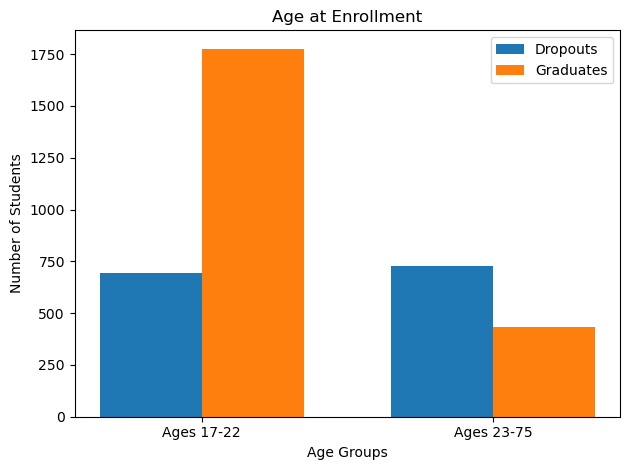

In [171]:
#Age at enrollment

age_17_22 = filtered_as_dataframe[(filtered_as_dataframe['Age at enrollment'] >= 17) & (filtered_as_dataframe['Age at enrollment'] <= 22)]
age_23_75 = filtered_as_dataframe[(filtered_as_dataframe['Age at enrollment'] >= 23) & (filtered_as_dataframe['Age at enrollment'] <= 75)]


age_17_22_drop = age_17_22[age_17_22['Target'] == 'Dropout'].shape[0]
age_17_22_grad = age_17_22[age_17_22['Target'] == 'Graduate'].shape[0]

age_23_75_drop = age_23_75[age_23_75['Target'] == 'Dropout'].shape[0]
age_23_75_grad = age_23_75[age_23_75['Target'] == 'Graduate'].shape[0]

age_17_22_count = age_17_22.shape[0]
age_23_75_count = age_23_75.shape[0]

age_groups = ['Ages 17-22', 'Ages 23-75']
dropouts = [age_17_22_drop, age_23_75_drop]
graduates = [age_17_22_grad, age_23_75_grad]


fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(age_groups))

bar_drop = plt.bar(index, dropouts, bar_width, label='Dropouts')
bar_grad = plt.bar(index + bar_width, graduates, bar_width, label='Graduates')


plt.xlabel('Age Groups')
plt.ylabel('Number of Students')
plt.title('Age at Enrollment')
plt.xticks(index+ bar_width/2, age_groups), 
plt.legend()

plt.tight_layout()
plt.show()


The dropout rate is much higher in students age 23 to 75. We will now look at the dropout rate for those in this group.

In [172]:
total_23_75 = age_23_75_drop + age_23_75_grad
dropout_rate_23_75 = (age_23_75_drop / total_23_75) * 100
dropout_rate_23_75

62.70456503014643

The dropout rate is 62.70%. Which means that more than half of the students ages 23 and over will dropout. It is recommeneded that University look into this further.

We will also use automation to highlight key dropout rates for a few of the factors below.

In [173]:
def dropout_rate(df,filter_column):
     filtered_df = df.loc[df[filter_column] == 1]
     filtered_df['Is Dropout'] = filtered_df['Target'].map({'Dropout': 1, 'Graduate': 0})
     dropout_rate= filtered_df['Target'].value_counts(normalize=True)
     return dropout_rate

In [174]:
pd.set_option('display.max_columns', None)

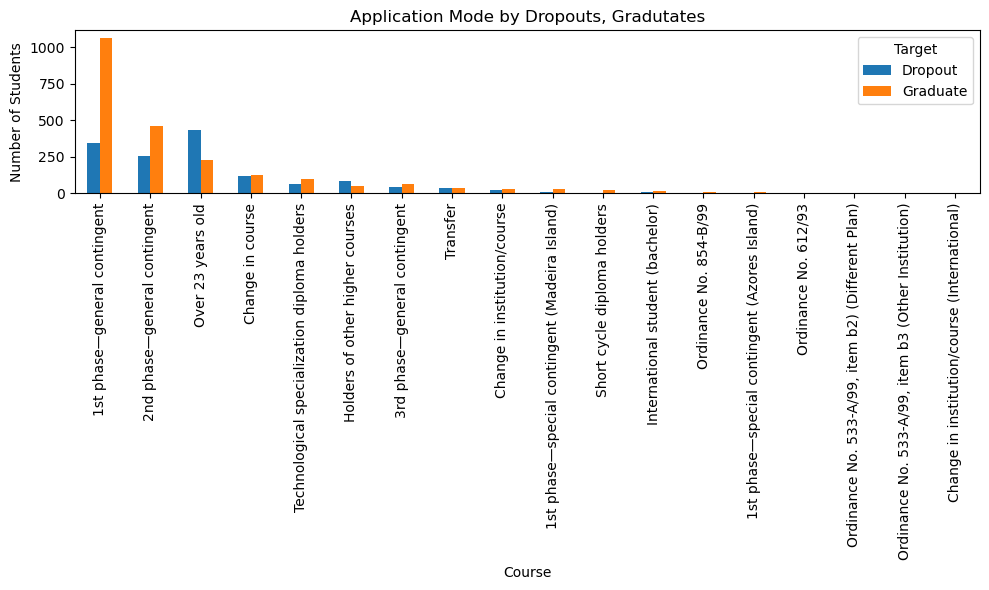

In [148]:
# Application Mode

counts_app_grouped = filtered_as_dataframe.groupby(['Application mode','Target']).size().reset_index(name = 'app counts')
counts_app = counts_app_grouped.pivot(index = 'Application mode', columns='Target', values='app counts')
counts_app = counts_app.rename(index={ 1: '1st phase—general contingent', 2: 'Ordinance No. 612/93', 3: '1st phase—special contingent (Azores Island)', 4: 'Holders of other higher courses', 5: 'Ordinance No. 854-B/99', 6: 'International student (bachelor)', 7: '1st phase—special contingent (Madeira Island)', 8: '2nd phase—general contingent', 9: '3rd phase—general contingent', 10: 'Ordinance No. 533-A/99, item b2) (Different Plan)', 11: 'Ordinance No. 533-A/99, item b3 (Other Institution)', 12: 'Over 23 years old', 13: 'Transfer', 14: 'Change in course', 15: 'Technological specialization diploma holders', 16: 'Change in institution/course', 17: 'Short cycle diploma holders', 18: 'Change in institution/course (International)'})

counts_app_sum = counts_app.sum(axis=1)
counts_app_order = counts_app_sum.sort_values(ascending = False)
counts_app_sorted = counts_app.loc[counts_app_order.index]

axes = counts_app_sorted.plot(kind='bar', stacked=False, figsize=(10,6))
axes.set_title('Application Mode by Dropouts, Gradutates')
axes.set_xlabel('Course')
axes.set_ylabel('Number of Students')

plt.tight_layout()
plt.show()

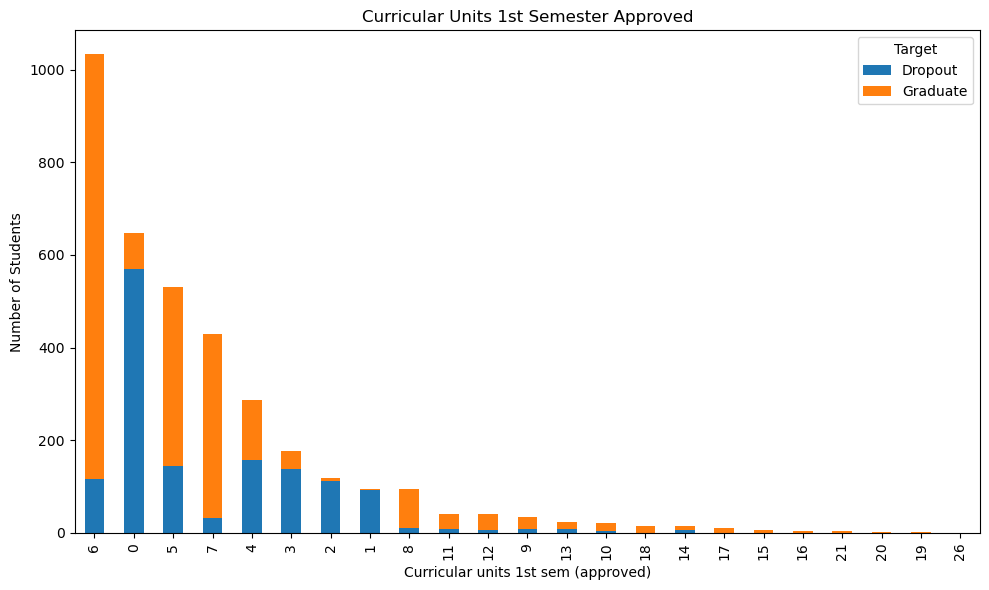

In [149]:
#Curricular units 1st Semester Approved

counts_apprunits1_grouped = filtered_as_dataframe.groupby(['Curricular units 1st sem (approved)','Target']).size().reset_index(name = 'counts')
counts_apprunits1 = counts_apprunits1_grouped.pivot(index = 'Curricular units 1st sem (approved)', columns='Target', values='counts')

counts_apprunits1_sum = counts_apprunits1.sum(axis=1)
counts_apprunits1_order = counts_apprunits1_sum.sort_values(ascending = False)
counts_apprunits1_sorted = counts_apprunits1.loc[counts_apprunits1_order.index]

axes = counts_apprunits1_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Curricular Units 1st Semester Approved')
axes.set_xlabel('Curricular units 1st sem (approved)')
axes.set_ylabel('Number of Students')

plt.tight_layout()
plt.show()

This graph shows that students that havent had any 1 semester curricular  units approved have a hight drop out rate.

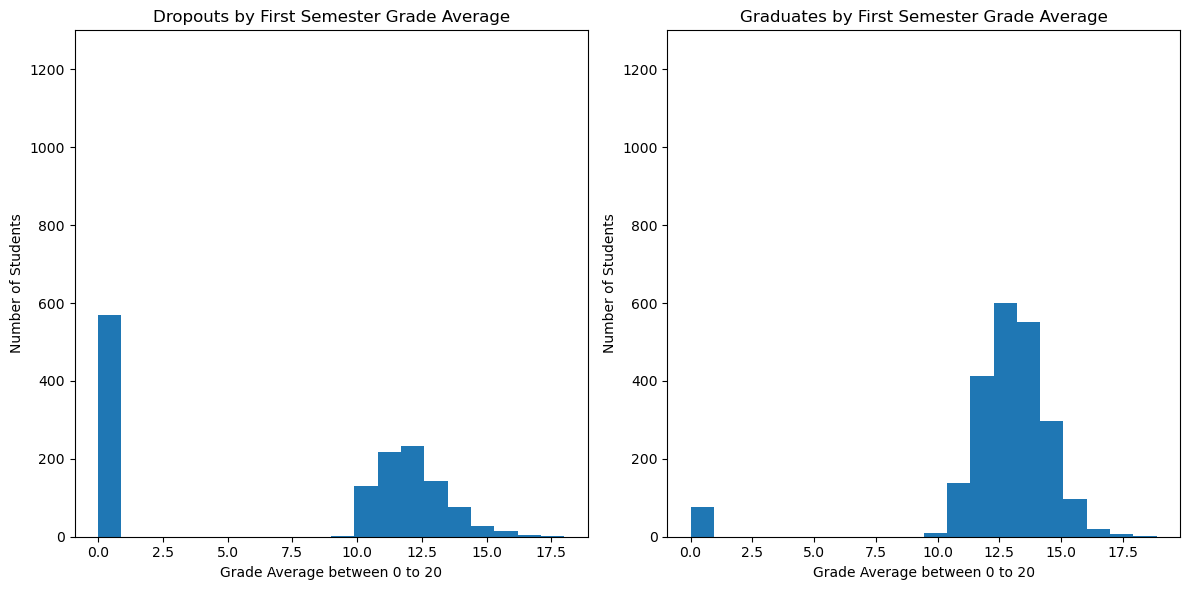

In [150]:
#Curricular units 1st Semester Grade Average

condition_dropouts = filtered_as_dataframe['Target'] == 'Dropout'
condition_graduate = filtered_as_dataframe['Target'] == 'Graduate'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


filtered_as_dataframe[condition_dropouts]['Curricular units 1st sem (grade)'].plot(kind='hist',ax=axes[0], bins=20)
axes[0].set_title("Dropouts by First Semester Grade Average")
axes[0].set_xlabel('Grade Average between 0 to 20')
axes[0].set_ylabel('Number of Students')
axes[0].set_ylim(0,1300)

filtered_as_dataframe[condition_graduate]['Curricular units 1st sem (grade)'].plot(kind='hist',ax=axes[1], bins=20)
axes[1].set_title("Graduates by First Semester Grade Average")
axes[1].set_xlabel('Grade Average between 0 to 20')
axes[1].set_ylabel('Number of Students')
axes[1].set_ylim(0,1300)

plt.tight_layout()
plt.show()


Students with a very low grade point average have a high dropout rate.

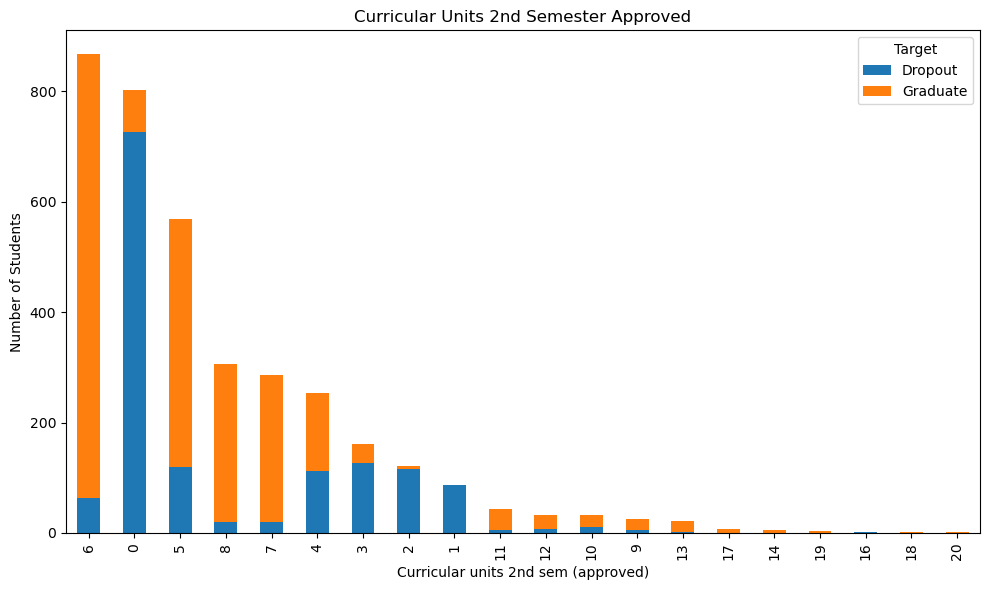

In [151]:
#Curricular units 2nd Semester Approved

counts_apprunits2_grouped = filtered_as_dataframe.groupby(['Curricular units 2nd sem (approved)','Target']).size().reset_index(name = 'counts')
counts_apprunits2 = counts_apprunits2_grouped.pivot(index = 'Curricular units 2nd sem (approved)', columns='Target', values='counts')

counts_apprunits2_sum = counts_apprunits2.sum(axis=1)
counts_apprunits2_order = counts_apprunits2_sum.sort_values(ascending = False)
counts_apprunits2_sorted = counts_apprunits2.loc[counts_apprunits2_order.index]

axes = counts_apprunits2_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Curricular Units 2nd Semester Approved')
axes.set_xlabel('Curricular units 2nd sem (approved)')
axes.set_ylabel('Number of Students')

plt.tight_layout()
plt.show()

Students with low credits have the highest dropout rate.

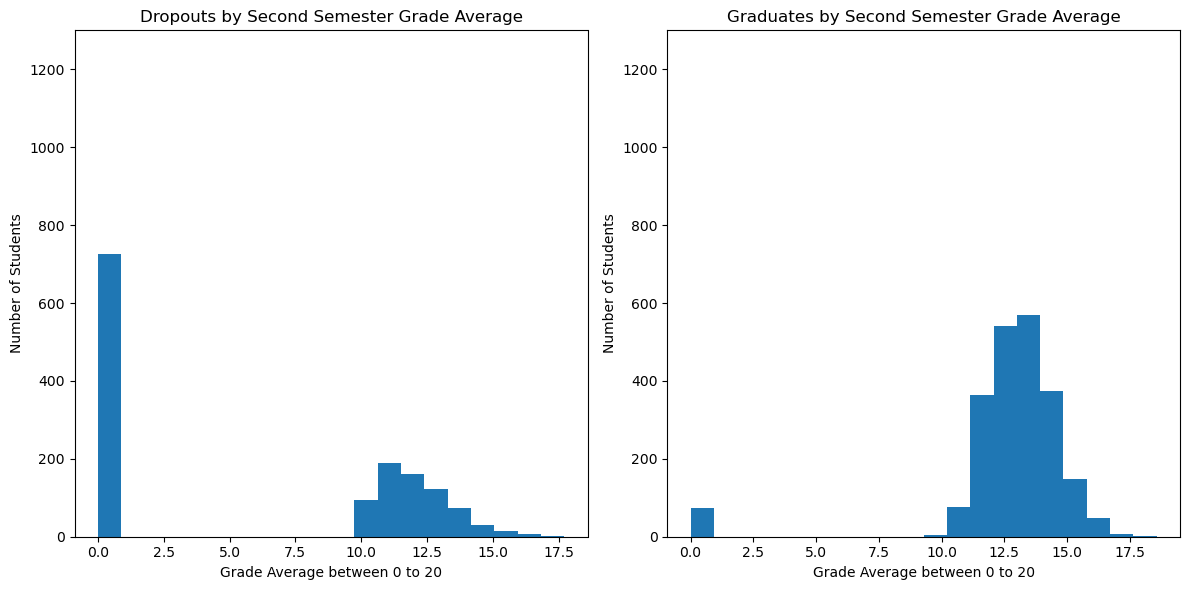

In [152]:
#Curricular units 2nd Semester Grade Average

condition_dropouts = filtered_as_dataframe['Target'] == 'Dropout'
condition_graduate = filtered_as_dataframe['Target'] == 'Graduate'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


filtered_as_dataframe[condition_dropouts]['Curricular units 2nd sem (grade)'].plot(kind='hist',ax=axes[0], bins=20)
axes[0].set_title("Dropouts by Second Semester Grade Average")
axes[0].set_xlabel('Grade Average between 0 to 20')
axes[0].set_ylabel('Number of Students')
axes[0].set_ylim(0,1300)

filtered_as_dataframe[condition_graduate]['Curricular units 2nd sem (grade)'].plot(kind='hist',ax=axes[1], bins=20)
axes[1].set_title("Graduates by Second Semester Grade Average")
axes[1].set_xlabel('Grade Average between 0 to 20')
axes[1].set_ylabel('Number of Students')
axes[1].set_ylim(0,1300)

plt.tight_layout()
plt.show()


Studnets with low grade point averages have the highest dropout rates.

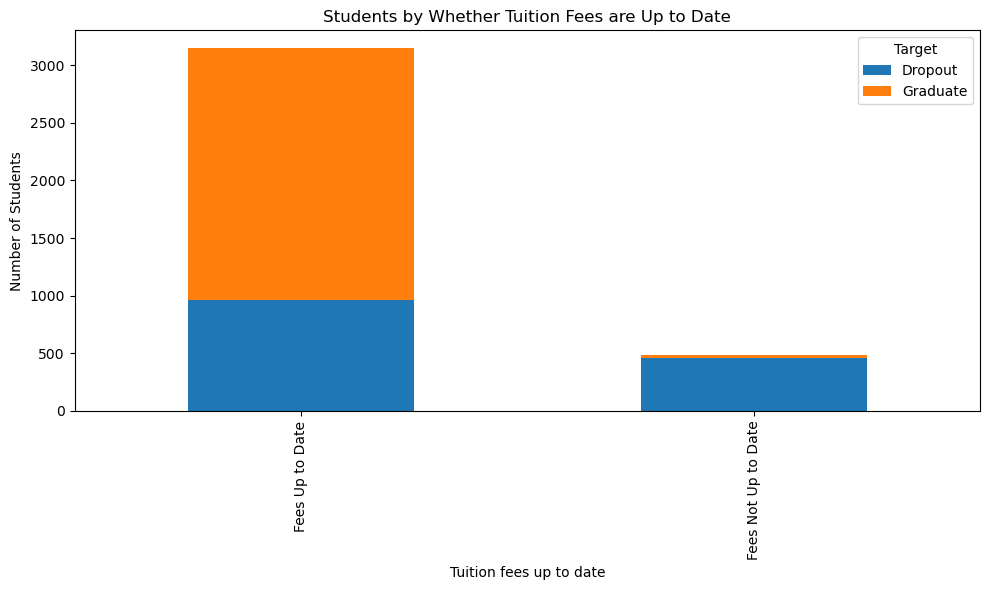

In [185]:
#Tuition Fees

counts_tuitionfees_grouped = filtered_as_dataframe.groupby(['Tuition fees up to date','Target']).size().reset_index(name = 'counts')
counts_tuitionfees = counts_tuitionfees_grouped.pivot(index = 'Tuition fees up to date', columns='Target', values='counts')

counts_tuitionfees_sum = counts_tuitionfees.sum(axis=1)
counts_tuitionfees_order = counts_tuitionfees_sum.sort_values(ascending = False)
counts_tuitionfees_sorted = counts_tuitionfees.loc[counts_tuitionfees_order.index]

axes = counts_tuitionfees_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Students by Whether Tuition Fees are Up to Date')
axes.set_xlabel('Tuition fees up to date')
axes.set_ylabel('Number of Students')
axes.set_xticklabels(['Fees Up to Date', 'Fees Not Up to Date'])

plt.tight_layout()
plt.show()


In [154]:
dropout_rate(filtered_as_dataframe,"Tuition fees up to date")

/var/folders/3w/tnb8pdtj10dc7frs7f9x04g00000gn/T/ipykernel_30665/4160477037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Is Dropout'] = filtered_df['Target'].map({'Dropout': 1, 'Graduate': 0})


Target
Graduate    0.693384
Dropout     0.306616
Name: proportion, dtype: float64

30.66% of studetents who have their tuition fees up to date drop out while 69.34% of students that have their tuition fees up to date go on to graduate.

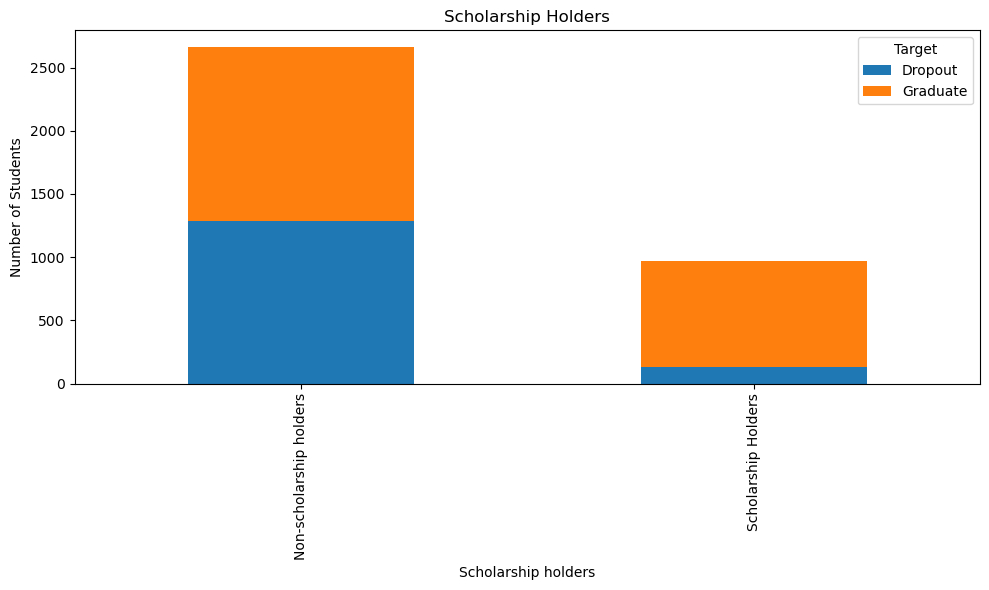

In [155]:
#Scholarship Recipient

counts_scholarship_grouped = filtered_as_dataframe.groupby(['Scholarship holder','Target']).size().reset_index(name = 'counts')
counts_scholarship = counts_scholarship_grouped.pivot(index = 'Scholarship holder', columns='Target', values='counts')

counts_scholarship_sum = counts_scholarship.sum(axis=1)
counts_scholarship_order = counts_scholarship_sum.sort_values(ascending = False)
counts_scholarship_sorted = counts_scholarship.loc[counts_scholarship_order.index]

axes = counts_scholarship_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Scholarship Holders')
axes.set_xlabel('Scholarship holders')
axes.set_ylabel('Number of Students')
axes.set_xticklabels(['Non-scholarship holders','Scholarship Holders'])

plt.tight_layout()
plt.show()

In [156]:
dropout_rate(filtered_as_dataframe,"Scholarship holder")

/var/folders/3w/tnb8pdtj10dc7frs7f9x04g00000gn/T/ipykernel_30665/4160477037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Is Dropout'] = filtered_df['Target'].map({'Dropout': 1, 'Graduate': 0})


Target
Graduate    0.861713
Dropout     0.138287
Name: proportion, dtype: float64

86.17% of scholarhip holders go on to graduate while 13.83% of scholarship holders dropout.

## Notable Takeaways for Academic Factors that did not meet the Top 10

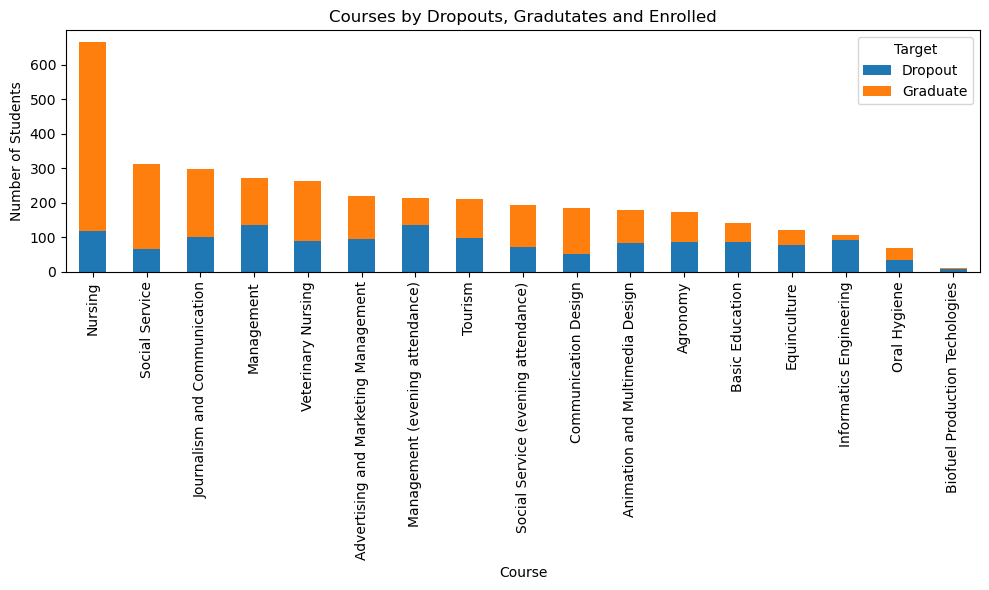

In [157]:
#Noteable Takeaways Courses

counts_course_grouped = filtered_as_dataframe.groupby(['Course','Target']).size().reset_index(name = 'counts')
counts_course = counts_course_grouped.pivot(index = 'Course', columns='Target', values='counts')
counts_course = counts_course.rename(index={ 1: 'Biofuel Production Techologies', 2: 'Animation and Multimedia Design', 3: 'Social Service (evening attendance)', 4: 'Agronomy', 5: 'Communication Design', 6: 'Veterinary Nursing', 7: 'Informatics Engineering', 8: 'Equinculture', 9: 'Management', 10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene', 14: 'Advertising and Marketing Management', 15: 'Journalism and Communication', 16: 'Basic Education', 17: 'Management (evening attendance)'})

counts_course_sum = counts_course.sum(axis=1)
counts_course_order = counts_course_sum.sort_values(ascending = False)
counts_course_sorted = counts_course.loc[counts_course_order.index]

axes = counts_course_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Courses by Dropouts, Gradutates and Enrolled')
axes.set_xlabel('Course')
axes.set_ylabel('Number of Students')

plt.tight_layout()
plt.show()

Nursing has the most graduates out of all of the majors.

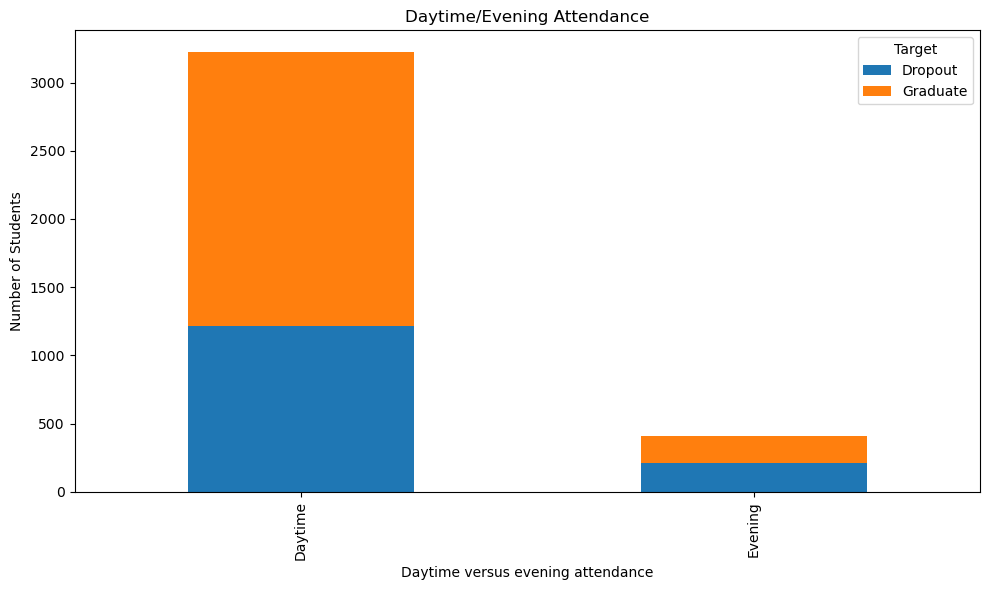

In [158]:
#Notable Mention Day Evening Attendance

counts_attend_grouped = filtered_as_dataframe.groupby(['Daytime/evening attendance','Target']).size().reset_index(name = 'counts')
counts_attend = counts_attend_grouped.pivot(index = 'Daytime/evening attendance', columns='Target', values='counts')

counts_attend_sum = counts_attend.sum(axis=1)
counts_attend_order = counts_attend_sum.sort_values(ascending = False)
counts_attend_sorted = counts_attend.loc[counts_attend_order.index]

axes = counts_attend_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Daytime/Evening Attendance')
axes.set_xlabel('Daytime versus evening attendance')
axes.set_ylabel('Number of Students')
axes.set_xticklabels(['Daytime', 'Evening'])
plt.tight_layout()
plt.show()

In [110]:
dropout_rate(filtered_as_dataframe,"Daytime/evening attendance")

/var/folders/3w/tnb8pdtj10dc7frs7f9x04g00000gn/T/ipykernel_30665/4160477037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Is Dropout'] = filtered_df['Target'].map({'Dropout': 1, 'Graduate': 0})


Target
Graduate    0.623215
Dropout     0.376785
Name: proportion, dtype: float64

37.68% of students that attend during the day drop out while 62.32% of students that attend during the day time graduate. Closer to 50% of students who attend in the evening drop out.

# Self/ Family Factors

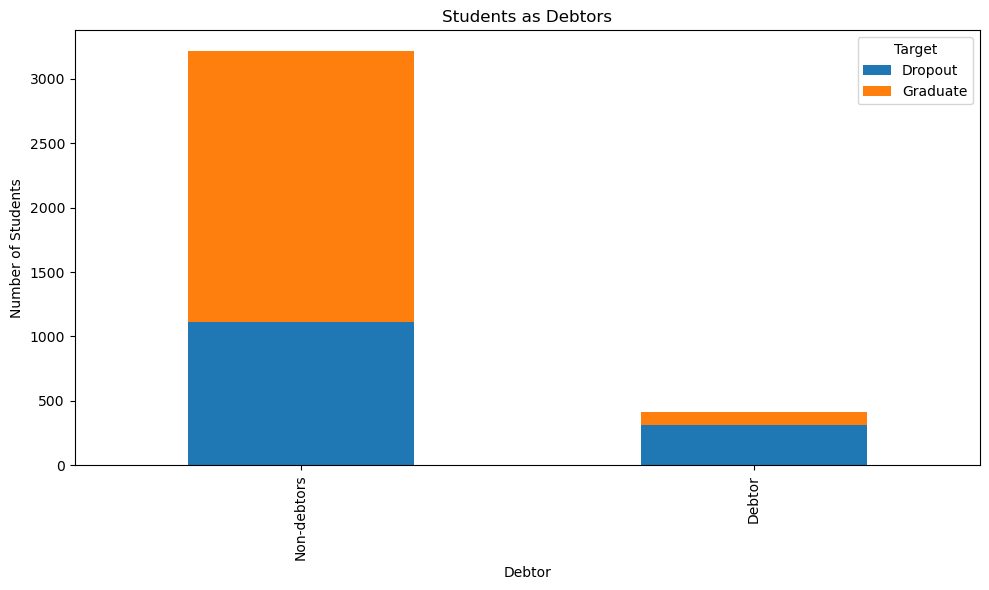

In [159]:
#Debtor

counts_debtor_grouped = filtered_as_dataframe.groupby(['Debtor','Target']).size().reset_index(name = 'counts')
counts_debtor = counts_debtor_grouped.pivot(index = 'Debtor', columns='Target', values='counts')

counts_debtor_sum = counts_debtor.sum(axis=1)
counts_debtor_order = counts_debtor_sum.sort_values(ascending = False)
counts_debtor_sorted = counts_debtor.loc[counts_debtor_order.index]

axes = counts_debtor_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Students as Debtors')
axes.set_xlabel('Debtor')
axes.set_ylabel('Number of Students')
axes.set_xticklabels(['Non-debtors', 'Debtor'])

plt.tight_layout()
plt.show()

In [160]:
dropout_rate(filtered_as_dataframe,"Debtor")

/var/folders/3w/tnb8pdtj10dc7frs7f9x04g00000gn/T/ipykernel_30665/4160477037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Is Dropout'] = filtered_df['Target'].map({'Dropout': 1, 'Graduate': 0})


Target
Dropout     0.755448
Graduate    0.244552
Name: proportion, dtype: float64

75.54% of debtors drop out of school while 24.46% of debtors graduate.

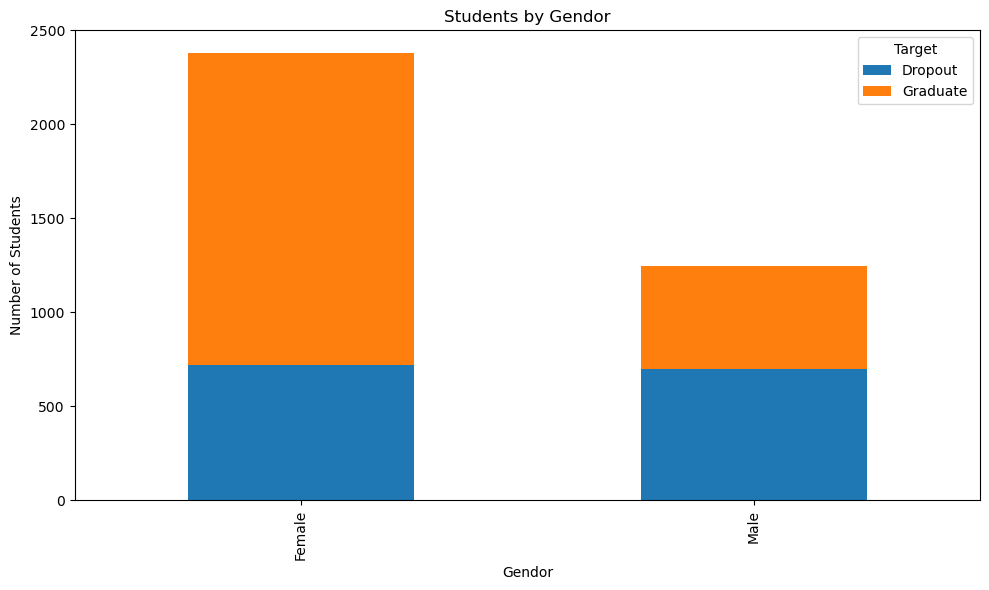

In [127]:
#Gender

counts_gender_grouped = filtered_as_dataframe.groupby(['Gender','Target']).size().reset_index(name = 'counts')
counts_gender= counts_gender_grouped.pivot(index = 'Gender', columns='Target', values='counts')

counts_gender_sum = counts_gender.sum(axis=1)
counts_gender_order = counts_gender_sum.sort_values(ascending = False)
counts_gender_sorted = counts_gender.loc[counts_gender_order.index]

axes = counts_gender_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Students by Gendor')
axes.set_xlabel('Gendor')
axes.set_ylabel('Number of Students')
axes.set_xticklabels(['Female', 'Male'])

plt.tight_layout()
plt.show()

In [161]:
pd.set_option('display.max_columns', None)

In [162]:
dropout_rate(filtered_as_dataframe,"Gender")

/var/folders/3w/tnb8pdtj10dc7frs7f9x04g00000gn/T/ipykernel_30665/4160477037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Is Dropout'] = filtered_df['Target'].map({'Dropout': 1, 'Graduate': 0})


Target
Dropout     0.561249
Graduate    0.438751
Name: proportion, dtype: float64

56.12% of males drop out while 43.87% of males graduate.

## Notable Takeaways for Self/Family Factors that did not meet the Top 10


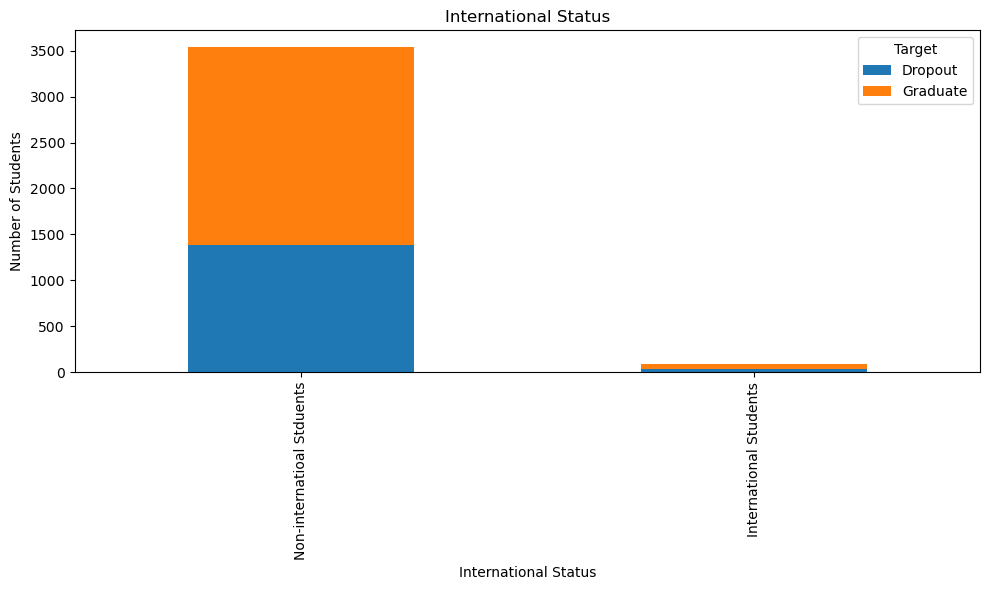

In [187]:
#International Student

counts_intl_grouped = filtered_as_dataframe.groupby(['International','Target']).size().reset_index(name = 'counts')
counts_intl= counts_intl_grouped.pivot(index = 'International', columns='Target', values='counts')

counts_intl_sum = counts_intl.sum(axis=1)
counts_intl_order = counts_intl_sum.sort_values(ascending = False)
counts_intl_sorted = counts_intl.loc[counts_intl_order.index]

axes = counts_intl_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('International Status')
axes.set_xlabel('International Status')
axes.set_ylabel('Number of Students')
axes.set_xticklabels(['Non-internatioal Stduents', 'International Students'])

plt.tight_layout()
plt.show()

In [114]:
dropout_rate(filtered_as_dataframe,"International")

/var/folders/3w/tnb8pdtj10dc7frs7f9x04g00000gn/T/ipykernel_30665/4160477037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Is Dropout'] = filtered_df['Target'].map({'Dropout': 1, 'Graduate': 0})


Target
Graduate    0.627907
Dropout     0.372093
Name: proportion, dtype: float64

37.21% of international students drop outm while 62.79% of graduate. 

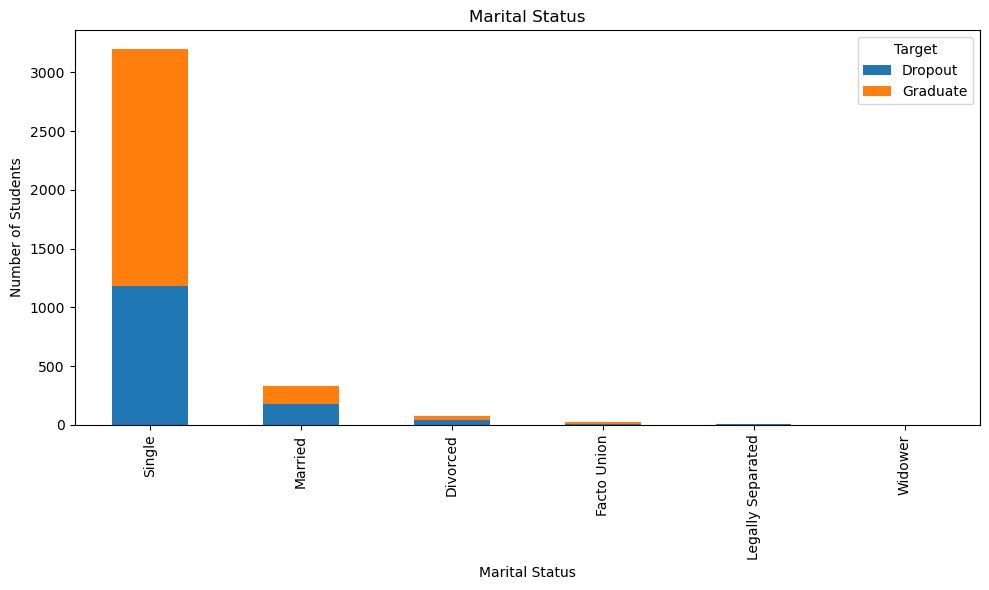

In [49]:
#Self Family Factors - marital status

counts_marital_grouped = filtered_as_dataframe.groupby(['Marital status','Target']).size().reset_index(name = 'counts')
counts_marital = counts_marital_grouped.pivot(index = 'Marital status', columns='Target', values='counts')
counts_marital = counts_marital.rename(index={ 1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto Union', 6: 'Legally Separated'})

counts_marital_sum = counts_marital.sum(axis=1)
counts_marital_order = counts_marital_sum.sort_values(ascending = False)
counts_marital_sorted = counts_marital.loc[counts_marital_order.index]

axes = counts_marital_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Marital Status')
axes.set_xlabel('Marital Status')
axes.set_ylabel('Number of Students')

plt.tight_layout()
plt.show()

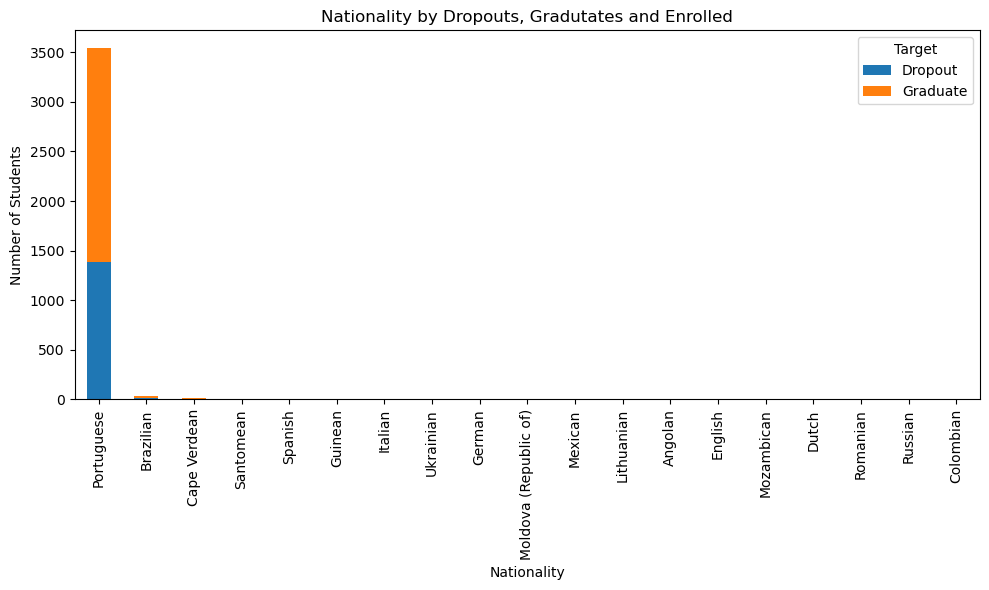

In [50]:
# Nationality

counts_nationality_grouped = filtered_as_dataframe.groupby(['Nationality','Target']).size().reset_index(name = 'natl counts')
counts_nationality = counts_nationality_grouped.pivot(index = 'Nationality', columns='Target', values='natl counts')
counts_nationality = counts_nationality.rename(index={ 1: 'Portuguese', 2: 'German', 3: 'Spanish', 4: 'Italian', 5: 'Dutch', 6: 'English', 7: 'Lithuanian', 8: 'Angolan', 9: 'Cape Verdean', 10: 'Guinean', 11: 'Mozambican', 12: 'Santomean', 13: 'Turkish', 14: 'Brazilian', 15: 'Romanian', 16: 'Moldova (Republic of)', 17: 'Mexican', 18: 'Ukrainian', 19:'Russian', 20:'Cuban', 21:'Colombian'})

counts_nationality_sum = counts_nationality.sum(axis=1)
counts_nationality_order = counts_nationality_sum.sort_values(ascending = False)
counts_nationality_sorted = counts_nationality.loc[counts_nationality_order.index]

axes = counts_nationality_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Nationality by Dropouts, Gradutates and Enrolled')
axes.set_xlabel('Nationality')
axes.set_ylabel('Number of Students')

plt.tight_layout()
plt.show()

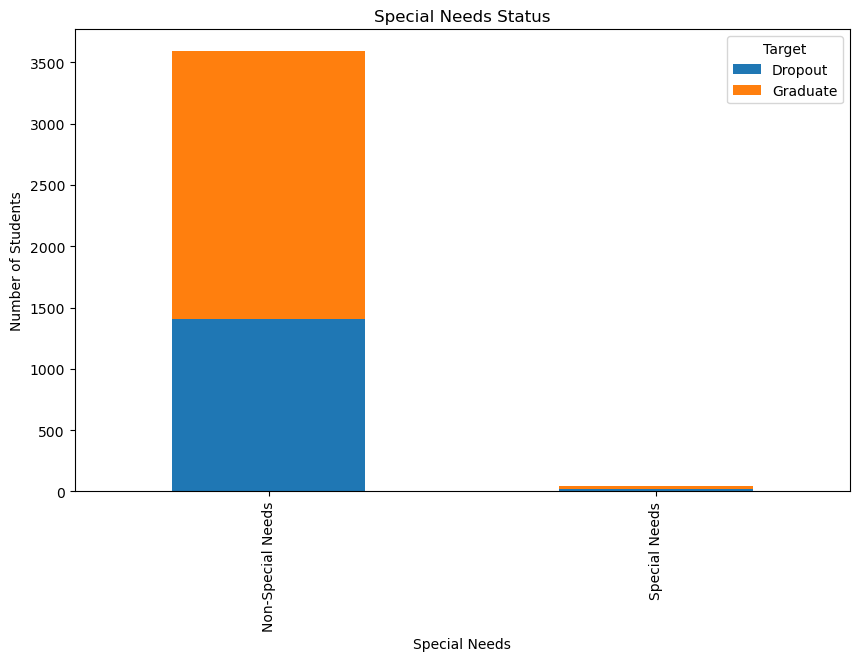

In [131]:
#Notable Take Away Special Needs

counts_sn_grouped = filtered_as_dataframe.groupby(['Educational special needs','Target']).size().reset_index(name = 'counts')
counts_sn= counts_sn_grouped.pivot(index = 'Educational special needs', columns='Target', values='counts')

counts_sn_sum = counts_sn.sum(axis=1)
counts_sn_order = counts_sn_sum.sort_values(ascending = False)
counts_sn_sorted = counts_sn.loc[counts_sn_order.index]

axes = counts_sn_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Special Needs Status')
axes.set_xlabel('Special Needs')
axes.set_ylabel('Number of Students')
axes.set_xticklabels(['Non-Special Needs', 'Special Needs'])

plt.show()

In [116]:
dropout_rate(filtered_as_dataframe,"Educational special needs")

/var/folders/3w/tnb8pdtj10dc7frs7f9x04g00000gn/T/ipykernel_30665/4160477037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Is Dropout'] = filtered_df['Target'].map({'Dropout': 1, 'Graduate': 0})


Target
Graduate    0.575
Dropout     0.425
Name: proportion, dtype: float64

42.50% of students who are classified as Educational Special Needs drop out while 57.50% graduate.

# Socio-Economic Factors

Displaced Students, GDP, Inflation, and Unemployment Rate

Text(0, 0.5, 'Number of Students')

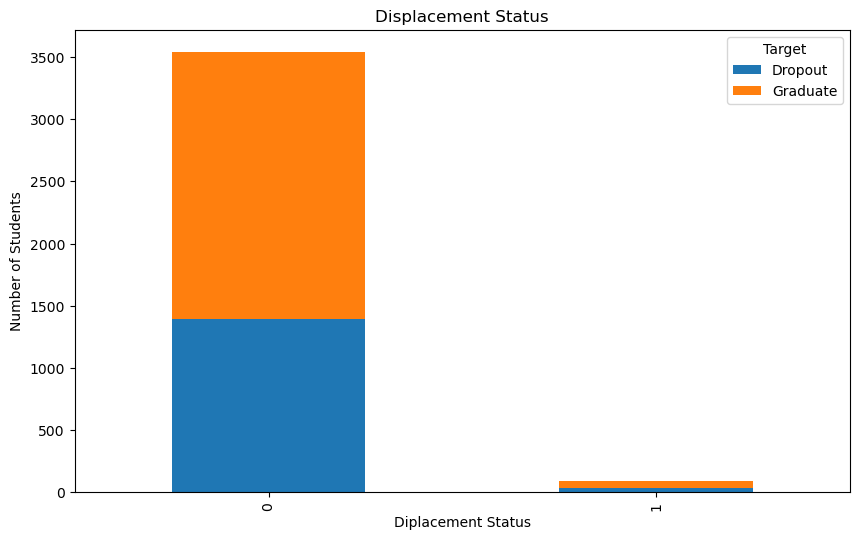

In [189]:
#Displaced

counts_disp_grouped = filtered_as_dataframe.groupby(['Displaced','Target']).size().reset_index(name = 'counts')
counts_disp= counts_disp_grouped.pivot(index = 'Displaced', columns='Target', values='counts')

counts_disp_sum = counts_disp.sum(axis=1)
counts_disp_order = counts_disp_sum.sort_values(ascending = False)
counts_disp_sorted = counts_disp.loc[counts_disp_order.index]

axes = counts_intl_sorted.plot(kind='bar', stacked=True, figsize=(10,6))
axes.set_title('Displacement Status')
axes.set_xlabel('Diplacement Status')
axes.set_ylabel('Number of Students')
axes.set_xticklabels(['Non-Displaced Stduents', 'Displaced Students'])


In [117]:
dropout_rate(filtered_as_dataframe,"Displaced")

/var/folders/3w/tnb8pdtj10dc7frs7f9x04g00000gn/T/ipykernel_30665/4160477037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Is Dropout'] = filtered_df['Target'].map({'Dropout': 1, 'Graduate': 0})


Target
Graduate    0.664325
Dropout     0.335675
Name: proportion, dtype: float64

33.57% of students that are displaced dropout while 66.43% that are displaced go on to graduate.

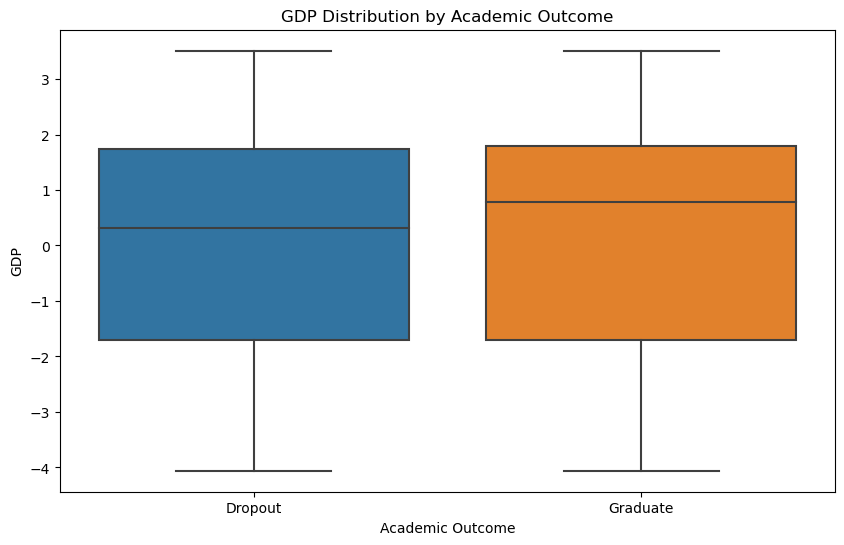

In [188]:
#GDP

plt.figure(figsize=(10, 6))

gdp_plot = sns.boxplot(x='Target', y='GDP', data=filtered_as_dataframe)
gdp_plot = filtered_as_dataframe['Target'] = filtered_as_dataframe['Target']
# gdp_plot = filtered_as_dataframe['Target'] = filtered_as_dataframe['Target'].replace({0: 'Dropout',2: 'Graduate', 1: 'Enrolled'})



plt.title('GDP Distribution by Academic Outcome')
plt.xlabel('Academic Outcome')
plt.ylabel('GDP')

plt.show()

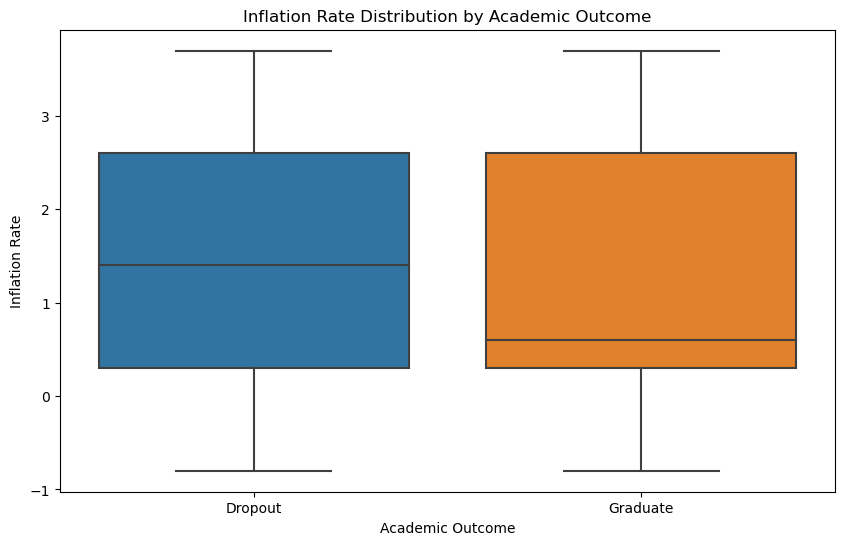

In [54]:
#Inflation

plt.figure(figsize=(10, 6))

inflation_plot = sns.boxplot(x='Target', y='Inflation rate', data=filtered_as_dataframe)
inflation_plot = filtered_as_dataframe['Target'] = filtered_as_dataframe['Target']
# inflation_plot = filtered_as_dataframe['Target'] = as_dataframe['Target'].replace({0: 'Dropout',2: 'Graduate', 1: 'Enrolled'})


plt.title('Inflation Rate Distribution by Academic Outcome')
plt.xlabel('Academic Outcome')
plt.ylabel('Inflation Rate')

plt.show()

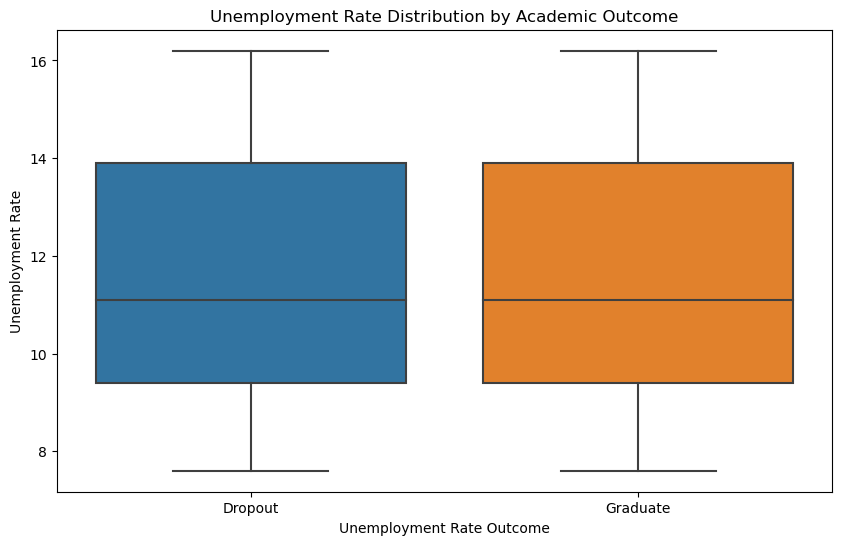

In [55]:
#Unemployment Rate

plt.figure(figsize=(10, 6))

unemployment_plot = sns.boxplot(x='Target', y='Unemployment rate', data=filtered_as_dataframe)
unemployment_plot = filtered_as_dataframe['Target'] = filtered_as_dataframe['Target']
# unemployment_plot = filtered_as_dataframe['Target'] = filtered_as_dataframe['Target'].replace({0: 'Dropout',2: 'Graduate', 1: 'Enrolled'})


plt.title('Unemployment Rate Distribution by Academic Outcome')
plt.xlabel('Unemployment Rate Outcome')
plt.ylabel('Unemployment Rate')

plt.show()

# Creating the Model

Lets create a model based on the top 10 factors that have the greatest correlation to the dropout rate. We will then train and test the model to evaluate it's performance.

In [182]:
desired_columns = [
    'Age at enrollment', 
    'Application mode', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (grade)', 
    'Scholarship holder', 
    'Tuition fees up to date', 
    'Debtor', 
    'Gender',
    'Target Numeric'
]

formodel_filtered_as_dataframe = filtered_as_dataframe[desired_columns]

In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = formodel_filtered_as_dataframe.drop('Target Numeric', axis=1)
y = formodel_filtered_as_dataframe['Target Numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(StandardScaler(), LogisticRegression())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1)) 
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Log Loss:", log_loss(y_test, y_pred_proba))

Accuracy: 0.8884297520661157
Precision: 0.9083333333333333
Recall: 0.7870036101083032
F1 Score: 0.8433268858800773
Confusion Matrix:
 [[427  22]
 [ 59 218]]
ROC AUC Score: 0.916071012197181
Log Loss: 0.33224556973076697


The model scored very high.   Precision which indicates that if the model predicts that a student will graduate, it is correct 90.83% of the time. The Accuracy of the model indicates that 88.84% of my model's predictions were correct. 

It is recommended that the University use this model to assist in identifying students who are at risk at dropping out. This model will help accelerate the prediction of whether a student will drop out and also help reduce the University's drop out rate.